In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
df = pd.read_csv('./titanic.zip')

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
df = df.drop(['PassengerId','Name','Ticket'],axis = 1)

In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [45]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X , y,test_size=0.33,random_state=42)

In [48]:
len(X_train) , len(y_train)

(280, 280)

## Random sample technique 

In [49]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age          59
SibSp         0
Parch         0
Fare          0
Cabin       217
Embarked      0
dtype: int64

In [50]:
a = X_train['Age'].dropna().sample(3)
a

334    27.0
190    34.0
215    42.0
Name: Age, dtype: float64

In [51]:
b = X_train['Age'].dropna().sample(X_train["Age"].isnull().sum() , random_state=42)
b

61     32.00
14     47.00
154    13.00
241    45.00
307     0.83
51     27.00
1      47.00
130    32.00
11     46.00
62     18.00
338    25.00
392    13.00
363    27.00
181    37.00
247    42.00
270    46.00
34     30.00
59     36.00
48     60.00
353    49.00
319    22.00
232    21.00
99     33.00
103    26.00
226    23.00
313    37.00
115    18.00
172    23.00
97     29.00
361    24.00
142    61.00
67     47.00
12     23.00
169    22.00
129    24.00
35     18.50
283     9.00
260    36.50
138    23.00
281     0.75
402    22.00
189    40.00
326    12.00
2      62.00
179    64.00
106    21.00
221    21.00
355    50.00
254    32.50
269    17.00
20     55.00
147    22.00
237    20.00
411    37.00
230    14.00
167    18.00
203     8.00
318    27.00
343    58.00
Name: Age, dtype: float64

In [52]:
X_train[X_train['Age'].isnull()].index

Int64Index([366,  83, 173, 227,  36, 219, 111, 342, 289,  10, 163, 255, 304,
            244, 146, 183, 297, 249, 274, 233, 199, 410, 127, 107, 312, 133,
            384,  65,  85, 170, 286,  41, 282, 256, 357, 292,  47, 267, 200,
            288, 216, 408, 382, 205,  91, 339,  88, 273, 243,  54,  58, 344,
            160, 191, 151, 121, 417, 188, 102],
           dtype='int64')

In [53]:
x = X_train[X_train['Age'].isnull()].head(1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
366,3,male,NaN,1,0,14.4583,NaN,C


In [54]:
s = X_train['Age'].dropna().sample(1 , random_state=42)
print(s)
s.index = [366]

X_train['Age_re'] = s

61    32.0
Name: Age, dtype: float64


In [55]:
x = X_train[X_train['Age'].isnull()].head(336)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_re
366,3,male,NaN,1,0,14.4583,NaN,C,32.0
83,3,male,NaN,0,0,7.8958,NaN,S,NaN
173,3,male,NaN,0,0,7.2292,NaN,C,NaN
227,3,female,NaN,0,0,7.7500,NaN,Q,NaN
36,3,female,NaN,0,0,8.0500,NaN,S,NaN
219,3,male,NaN,0,0,8.0500,NaN,S,NaN
111,3,female,NaN,0,0,7.7792,NaN,Q,NaN
342,3,male,NaN,1,9,69.5500,NaN,S,NaN
289,3,male,NaN,0,0,8.0500,NaN,S,NaN
10,3,male,NaN,0,0,7.8958,NaN,S,NaN


In [56]:
def fun(X_train , var):
    X_train[var+'_replaced_ra'] = X_train['Age'].copy()
    s = X_train['Age'].dropna().sample(X_train[var].isnull().sum(),random_state = 42)
    s.index = X_train[X_train['Age'].isnull()].index
    X_train.loc[X_train['Age'].isnull() , 'Age_replaced_ra'] = s
    
    
    
fun(X_train , 'Age')

In [57]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_re,Age_replaced_ra
109,2,male,18.5,0,0,13.0000,F,S,NaN,18.5
176,2,female,20.0,0,0,36.7500,NaN,S,NaN,20.0
366,3,male,NaN,1,0,14.4583,NaN,C,32.0,32.0
407,1,male,50.0,1,1,211.5000,C80,C,NaN,50.0
280,3,female,23.0,0,0,8.6625,NaN,S,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...
71,3,male,21.0,0,0,7.8958,NaN,S,NaN,21.0
106,3,male,21.0,0,0,7.8208,NaN,Q,NaN,21.0
270,1,male,46.0,0,0,75.2417,C6,C,NaN,46.0
348,2,male,24.0,0,0,13.5000,NaN,S,NaN,24.0


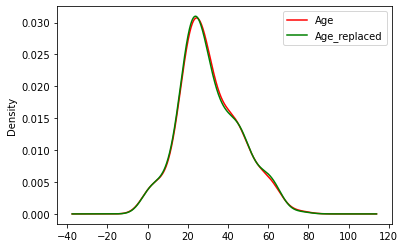

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
X_train['Age'].plot(kind='kde',color='r',ax=ax,label= 'Age')
X_train['Age_replaced_ra'].plot(kind='kde',color='g',ax=ax,label= 'Age_replaced')
plt.legend(loc=0)
plt.show()
